In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(67)

In [6]:
class Environment:

    def __init__(self, probs):
        self.probs = probs  # success probabilities for each arm

    def step(self, action):
        # Pull arm and get stochastic reward (1 for success, 0 for failure)
        return 1 if (np.random.random()  < self.probs[action]) else 0

In [16]:
class Agent:

    def __init__(self, nActions, eps):
        self.nActions = nActions
        self.eps = eps
        self.n = np.zeros(nActions, dtype=int) # action counts n(a)
        self.Q = np.zeros(nActions, dtype=float) # value Q(a)

    def update_Q(self, action, reward):
        # Update Q action-value given (action, reward)
        self.n[action] += 1
        self.Q[action] += (1.0/self.n[action]) * (reward - self.Q[action])

    def get_action(self):
        # Epsilon-greedy policy
        if np.random.random() < self.eps: # explore
            return np.random.randint(self.nActions)
        else: # exploit
            return np.random.choice(np.flatnonzero(self.Q == self.Q.max()))

In [17]:
# Start multi-armed bandit simulation
def experiment(probs, N_episodes):
    env = Environment(probs) # initialize arm probabilities
    agent = Agent(len(env.probs), eps)  # initialize agent
    actions, rewards = [], []
    for episode in range(N_episodes):
        action = agent.get_action() # sample policy
        reward = env.step(action) # take step + get reward
        agent.update_Q(action, reward) # update Q
        actions.append(action)
        rewards.append(reward)
    return np.array(actions), np.array(rewards)

In [22]:
# Settings
probs = [0.10, 0.50, 0.60, 0.80, 0.10,
         0.25, 0.60, 0.45, 0.75, 0.65] # bandit arm probabilities of success
N_experiments = 10000 # number of experiments to perform
N_steps = 500 # number of steps (episodes)
eps = 0.1 # probability of random exploration (fraction)
save_fig = True # save file in same directory
output_dir = os.path.join(os.getcwd(), "output")

In [23]:
# Run multi-armed bandit experiments
print("Running multi-armed bandits with nActions = {}, eps = {}".format(len(probs), eps))
R = np.zeros((N_steps,))  # reward history sum
A = np.zeros((N_steps, len(probs)))  # action history sum
for i in range(N_experiments):
    actions, rewards = experiment(probs, N_steps)  # perform experiment
    if (i + 1) % (N_experiments / 100) == 0:
        print("[Experiment {}/{}] ".format(i + 1, N_experiments) +
              "n_steps = {}, ".format(N_steps) +
              "reward_avg = {}".format(np.sum(rewards) / len(rewards)))
    R += rewards
    for j, a in enumerate(actions):
        A[j][a] += 1

Running multi-armed bandits with nActions = 10, eps = 0.1
[Experiment 100/10000] n_steps = 500, reward_avg = 0.71
[Experiment 200/10000] n_steps = 500, reward_avg = 0.762
[Experiment 300/10000] n_steps = 500, reward_avg = 0.688
[Experiment 400/10000] n_steps = 500, reward_avg = 0.788
[Experiment 500/10000] n_steps = 500, reward_avg = 0.778
[Experiment 600/10000] n_steps = 500, reward_avg = 0.74
[Experiment 700/10000] n_steps = 500, reward_avg = 0.69
[Experiment 800/10000] n_steps = 500, reward_avg = 0.704
[Experiment 900/10000] n_steps = 500, reward_avg = 0.632
[Experiment 1000/10000] n_steps = 500, reward_avg = 0.766
[Experiment 1100/10000] n_steps = 500, reward_avg = 0.582
[Experiment 1200/10000] n_steps = 500, reward_avg = 0.656
[Experiment 1300/10000] n_steps = 500, reward_avg = 0.698
[Experiment 1400/10000] n_steps = 500, reward_avg = 0.722
[Experiment 1500/10000] n_steps = 500, reward_avg = 0.596
[Experiment 1600/10000] n_steps = 500, reward_avg = 0.774
[Experiment 1700/10000] n_

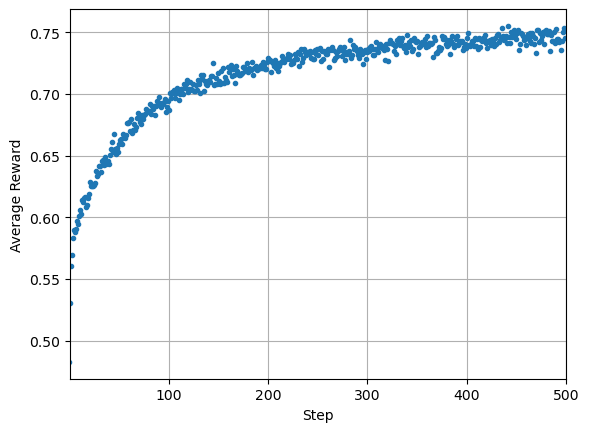

In [24]:
# Plot reward results
R_avg =  R / float(N_experiments)
plt.plot(R_avg, ".")
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.grid()
ax = plt.gca()
plt.xlim([1, N_steps])
plt.show()
plt.close()

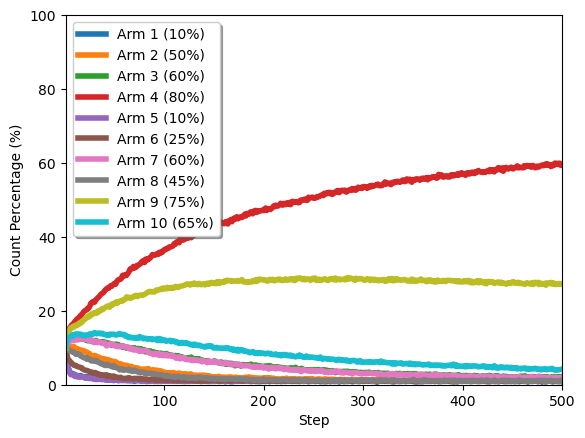

In [25]:
# Plot action results
for i in range(len(probs)):
    A_pct = 100 * A[:,i] / N_experiments
    steps = list(np.array(range(len(A_pct)))+1)
    plt.plot(steps, A_pct, "-",
             linewidth=4,
             label="Arm {} ({:.0f}%)".format(i+1, 100*probs[i]))
plt.xlabel("Step")
plt.ylabel("Count Percentage (%)")
plt.legend(loc='upper left', shadow=True)
plt.xlim([1, N_steps])
plt.ylim([0, 100])
plt.show()
plt.close()